# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [3]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

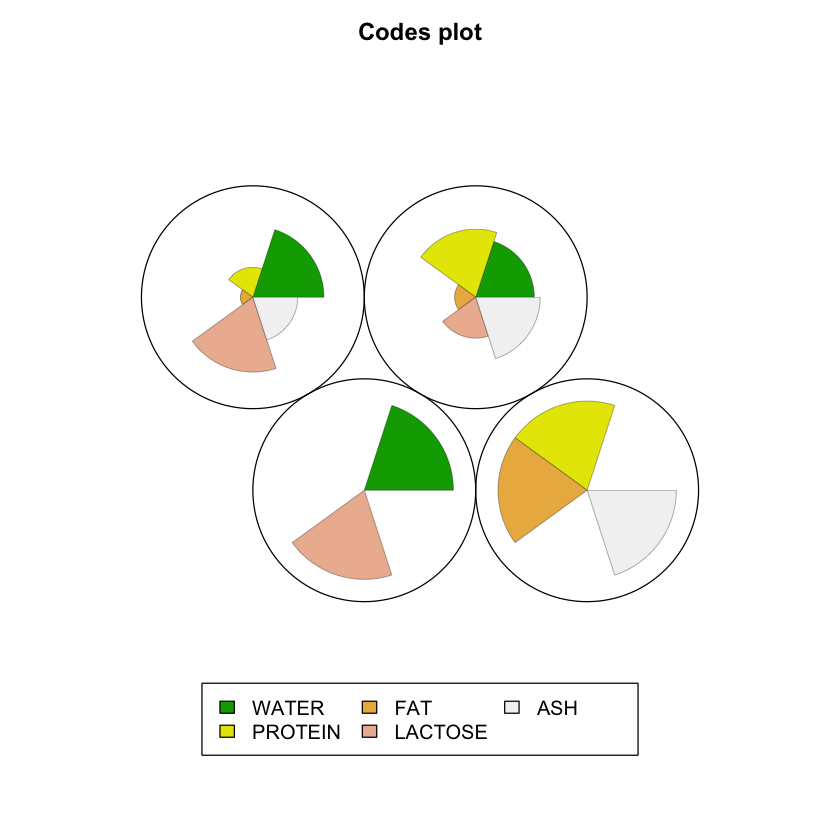

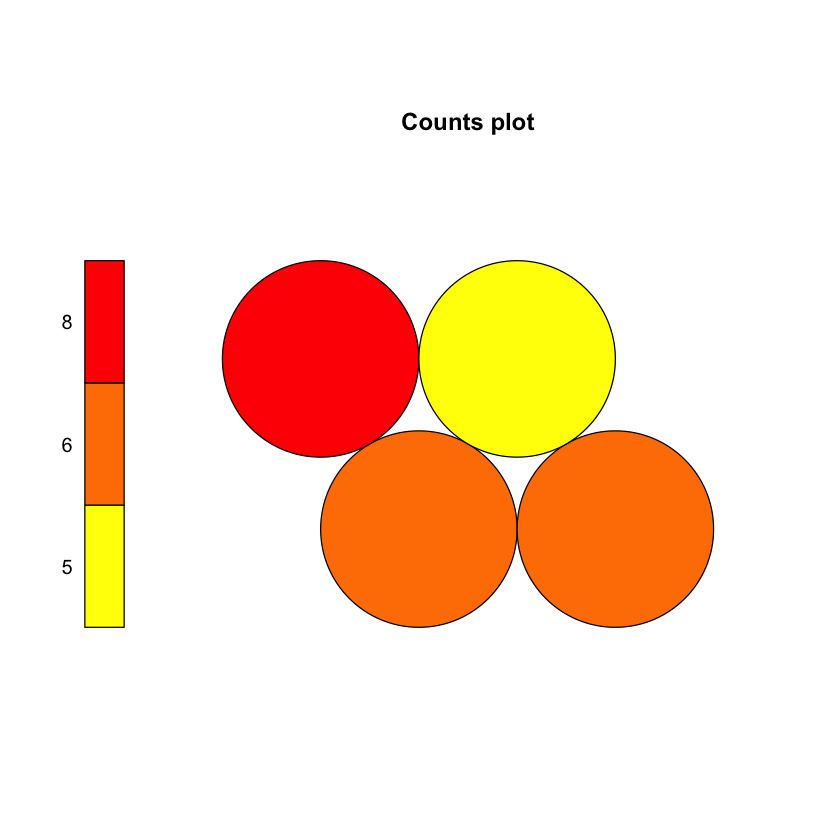

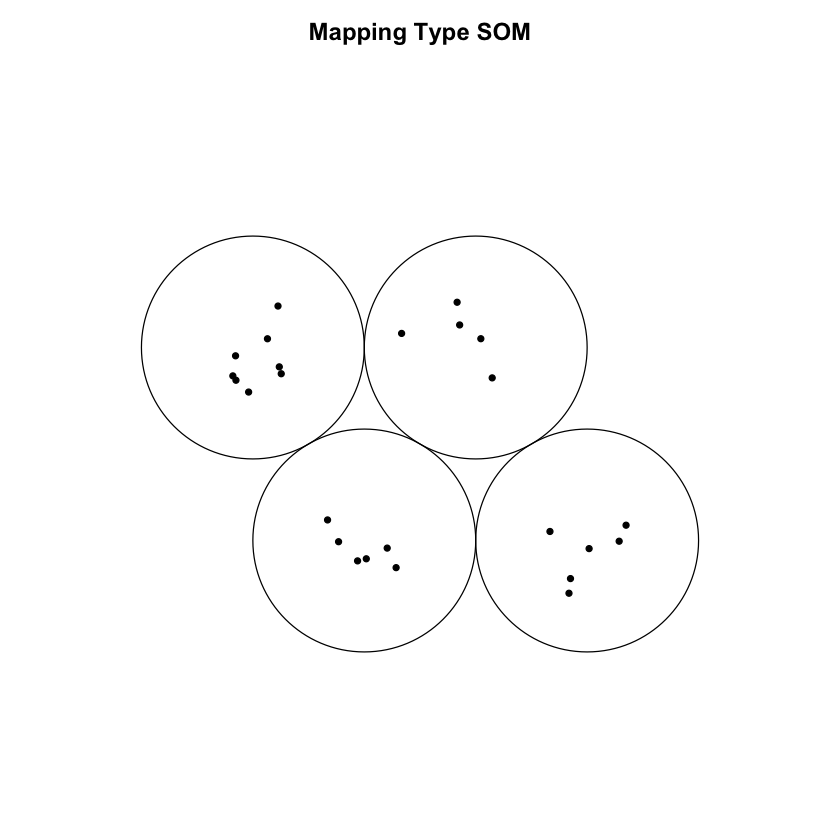

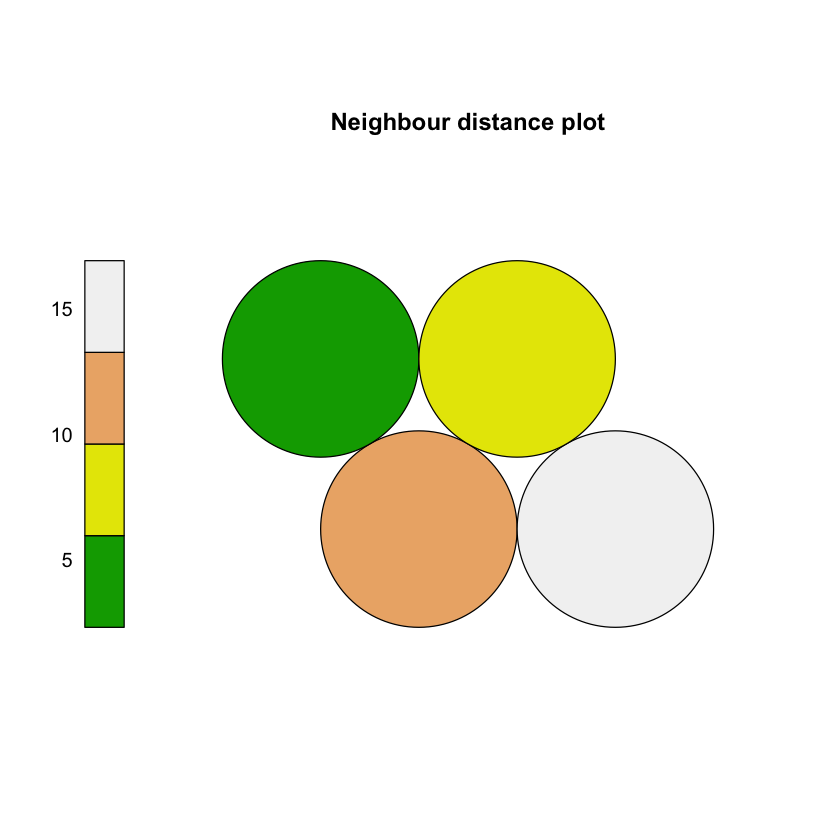

In [11]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

RESPUESTA
Self-organizing map
Son una herramienta para visualizar patrones en datos de alta dimensión al producir una representación bidimensional

ejemplo som(scale(datos), grid = somgrid(2, 2, "hexagonal"))

:som( data, grid, rlen, alpha,radius)
entradas

data: matriz de datos
grid:grilla
rlen :
alpha
radius

Salidas


data: matriz de datos(solo retornada si se selecciona keep.data==TRUE)
grid: la grilla
codes: matriz de vectores codigo
changes: vector de desviacion absoluta mediana a partir de vectores codigo
method: tipo de som

GRAFICOS:

CODE  Muestra los pesos relacionados a los nodos. En este caso, muestra la distribución de los componentes que componen la leche de cada grupo

COUNTS Muestra la cantidad de objetos que son mapeados en cada uno de los nodos

MAPPING TYPE Muestra donde son mapeados los objetos.

NEIGHBOUR DISTANCE Muestra la suma de distancias de todos los vecinos cercanos.


b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 




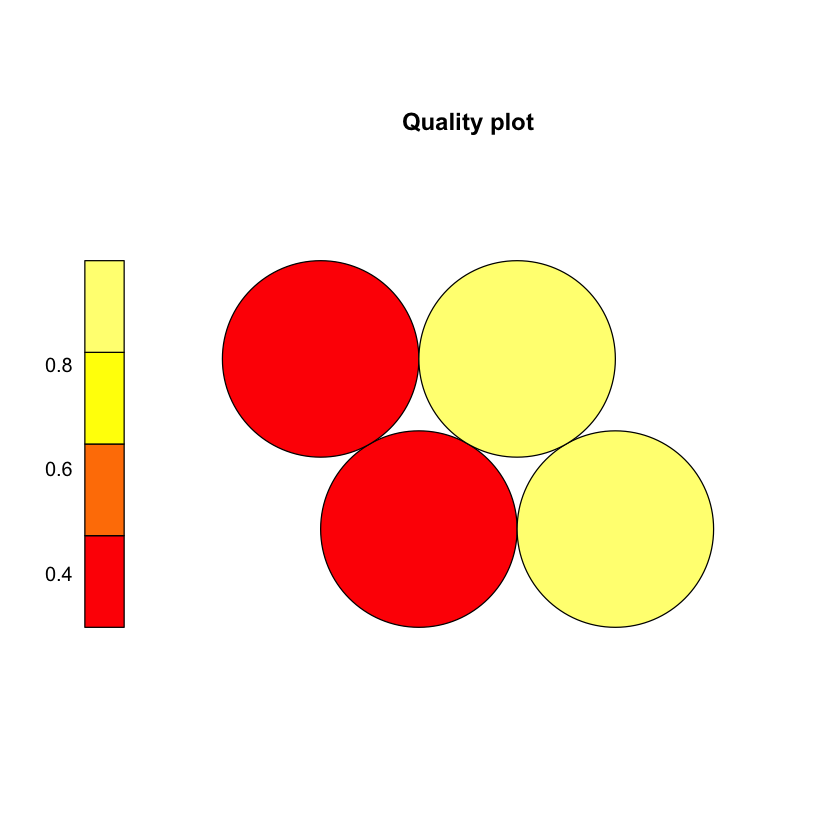

In [7]:
plot(sommap, type = "quality")

QUALITY: Muestra la distancia media de los objetos mapeados en cada uno de los grupos. Mientras menor sea la distancia significa que los objetos son representados de mejor forma dentro de los grupos correspondientes

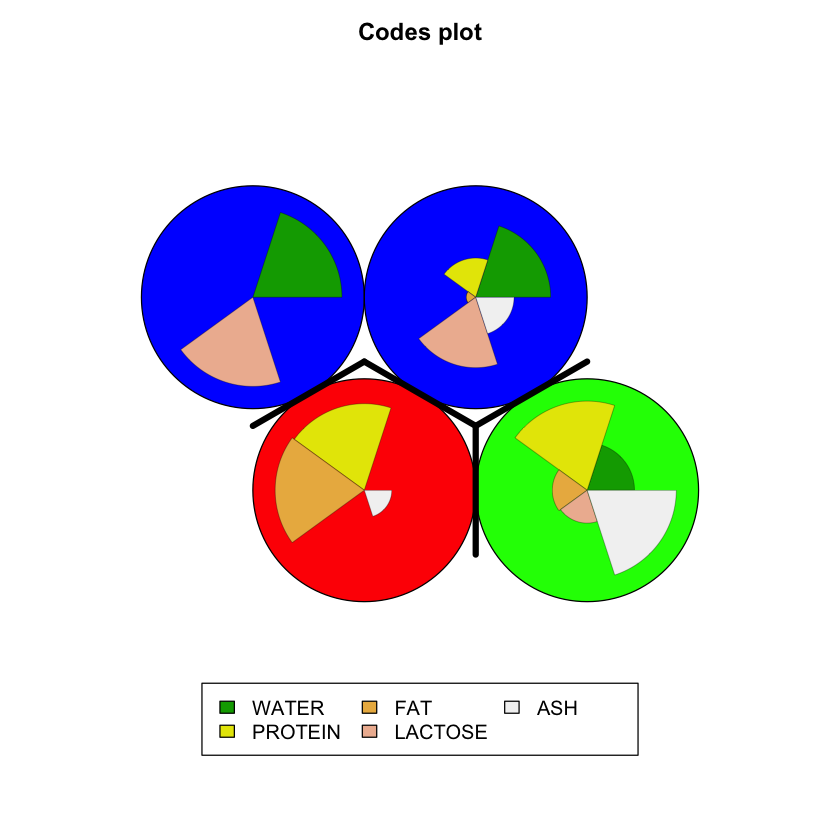

In [10]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 
a) Explique como funciona esta nueva visualización.
b) Interprete y comente los resultados obtenidos. 

In [ ]:
a) es un grafico SOM  se parte por cortar el arbol a altura 3 con cutree (som.hc <- cutree(hclust(dist(mat)), 3))
add.cluster.boundaries(sommap, som.hc) agrega las lineas que separa los grupos por colores segun su cluster

b) los circulos azules predominan lactosa, y agua mientras que en el rojo grasa y proteina, y el varde  proteia y calsio


Ejercicio 3: 
a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección
b) Realice las estimaciones y discuta sus resultados.

In [13]:
library(kohonen)
data <-read.csv("imports-85.data",sep=",",header=FALSE)

In [16]:
data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
1,?,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,⋯,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?
